# Introduction
<a id='introduction'></a>

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Notebook Schema




[1. Introduction](#introduction)

[2. Import Statements](#import-statements)

[3. Loading the Data](#loading-data)

[4. Preliminary Data Exploration](#data-exploration)

[5. Data Cleaning - Checking for Missing Values and Duplicates](#data-cleaning)

[6. Chart the Poverty Rate in each US State](#6)

[7. Chart the High School Graduation Rate by US State](#7)

[8. Visualising the Relationship between Poverty Rates and High School Graduation Rates](#8)

[9. Creating a Bar Chart with Subsections Showing the Racial Makeup of Each US State](#9)

[10. Creating Donut Chart by of People Killed by Race](#10)

[11. Creating a Chart Comparing the Total Number of Deaths of Men and Women](#11)

[12. Creating a Box Plot Showing the Age and Manner of Death](#12)

[13. Were People Armed? ](#13)

[14. How Old Were the People Killed?](#14)

[15. Race of People Killed](#15)

[16. Mental Illness and Police Killings](#16)

[17. In Which Cities Do the Most Police Killings Take Place?](#17)

[18. Rate of Death by Race](#18)

[19. Creating a Choropleth Map of Police Killings by US State](#19)

[20. Number of Police Killings Over Time](#20)

[21. Epilogue](#21)

## Import Statements 
<a id='import-statements'></a>

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Loading the Data
<a id='loading-data'></a>

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration
<a id='data-exploration'></a>
* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?

In [5]:
# What is the shape of the DataFrames?
print(f"Median_Household_Income_2015 -      {df_hh_income.shape}")
print(f"Pct_People_Below_Poverty_Level -    {df_pct_poverty.shape}")
print(f"Pct_Over_25_Completed_High_School - {df_pct_completed_hs.shape}")
print(f"Share_of_Race_By_City -             {df_share_race_city.shape}")
print(f"Deaths_by_Police_US -               {df_fatalities.shape}")

Median_Household_Income_2015 -      (29322, 3)
Pct_People_Below_Poverty_Level -    (29329, 3)
Pct_Over_25_Completed_High_School - (29329, 3)
Share_of_Race_By_City -             (29268, 7)
Deaths_by_Police_US -               (2535, 14)


In [6]:
# What are the column names?
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Data Cleaning - Checking for Missing Values and Duplicates
<a id='data-cleaning'></a>

In [7]:
def check_table(df):
    """
    Function to check for duplicates and missing values in a DataFrame.
    """
    # Check for duplicate rows
    duplicates = df.duplicated()
    num_duplicates = duplicates.sum()
    
    # Check for missing values in each column
    missing_values = df.isnull().sum()
    total_missing_values = missing_values.sum()

    # Summary of duplicates
    print(f"Total number of duplicate rows: {num_duplicates}")
    if num_duplicates > 0:
        print("Duplicate rows:")
        print(df[duplicates])
    else:
        print("No duplicate rows found.")

    # Summary of missing values
    print("\nMissing values in each column:")
    print(missing_values)
    if total_missing_values > 0:
        print("\nRows with missing values:")
        print(df[df.isnull().any(axis=1)])
    else:
        print("No missing values found.")


In [8]:
# Check for missing values
check_table(df_hh_income)

Total number of duplicate rows: 0
No duplicate rows found.

Missing values in each column:
Geographic Area     0
City                0
Median Income      51
dtype: int64

Rows with missing values:
      Geographic Area                    City Median Income
29119              WY              Albany CDP           NaN
29121              WY              Alcova CDP           NaN
29123              WY    Alpine Northeast CDP           NaN
29126              WY      Antelope Hills CDP           NaN
29129              WY           Arlington CDP           NaN
29130              WY   Arrowhead Springs CDP           NaN
29132              WY       Atlantic City CDP           NaN
29133              WY              Auburn CDP           NaN
29139              WY             Bedford CDP           NaN
29140              WY       Bessemer Bend CDP           NaN
29141              WY              Beulah CDP           NaN
29142              WY            Big Horn CDP           NaN
29144              WY  

In [9]:
# Replace '-' and '(X)' symbols with NaN
df_hh_income['Median Income'] = df_hh_income['Median Income'].replace(['-', '(X)'], np.nan)

# Remove commas and trailing hyphens
df_hh_income['Median Income'] = df_hh_income['Median Income'].str.replace(',', '')
df_hh_income['Median Income'] = df_hh_income['Median Income'].str.rstrip('-')
df_hh_income['Median Income'] = df_hh_income['Median Income'].str.rstrip('+')

# Convert the 'Median Income' column to float
df_hh_income['Median Income'] = df_hh_income['Median Income'].astype(float)

# Fill missing values with the median income for each 'Geographic Area'
df_hh_income['Median Income'] = df_hh_income.groupby('Geographic Area')['Median Income'].transform(lambda x: x.fillna(x.median()))

# Check for missing values
check_table(df_hh_income)

Total number of duplicate rows: 0
No duplicate rows found.

Missing values in each column:
Geographic Area    0
City               0
Median Income      0
dtype: int64
No missing values found.


In [10]:
# Convert 'poverty_rate' to numeric
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

# Check for missing values
check_table(df_pct_poverty)

Total number of duplicate rows: 0
No duplicate rows found.

Missing values in each column:
Geographic Area      0
City                 0
poverty_rate       201
dtype: int64

Rows with missing values:
      Geographic Area              City  poverty_rate
573                AL       Whatley CDP           NaN
608                AK  Attu Station CDP           NaN
632                AK       Chicken CDP           NaN
637                AK       Chisana CDP           NaN
662                AK      Dot Lake CDP           NaN
...               ...               ...           ...
29261              WY        Oakley CDP           NaN
29266              WY     Owl Creek CDP           NaN
29273              WY  Powder River CDP           NaN
29289              WY     Ryan Park CDP           NaN
29304              WY    Table Rock CDP           NaN

[201 rows x 3 columns]


In [11]:
# Calculate median poverty rate by geographic_area
median_poverty_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].median()

# Fill missing values with the calculated medians
df_pct_poverty['poverty_rate'] = df_pct_poverty.apply(lambda row: median_poverty_rate[row['Geographic Area']] if pd.isnull(row['poverty_rate']) else row['poverty_rate'], axis=1)

# Check for missing values
check_table(df_pct_poverty)

Total number of duplicate rows: 0
No duplicate rows found.

Missing values in each column:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
No missing values found.


In [12]:
# Convert 'percent_completed_hs' to numeric
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Check for missing values
check_table(df_pct_completed_hs)

Total number of duplicate rows: 0
No duplicate rows found.

Missing values in each column:
Geographic Area           0
City                      0
percent_completed_hs    197
dtype: int64

Rows with missing values:
      Geographic Area              City  percent_completed_hs
573                AL       Whatley CDP                   NaN
632                AK       Chicken CDP                   NaN
637                AK       Chisana CDP                   NaN
662                AK      Dot Lake CDP                   NaN
667                AK     Edna Bay city                   NaN
...               ...               ...                   ...
29261              WY        Oakley CDP                   NaN
29266              WY     Owl Creek CDP                   NaN
29273              WY  Powder River CDP                   NaN
29289              WY     Ryan Park CDP                   NaN
29304              WY    Table Rock CDP                   NaN

[197 rows x 3 columns]


In [13]:
# Calculate median percent_completed_hs by Geographic Area
median_hs_completion = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].median()

# Fill missing values with the calculated medians
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs.apply(lambda row: median_hs_completion[row['Geographic Area']] 
                                      if pd.isnull(row['percent_completed_hs']) 
                                      else row['percent_completed_hs'], axis=1)

# Check for missing values
check_table(df_pct_completed_hs)

Total number of duplicate rows: 0
No duplicate rows found.

Missing values in each column:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
No missing values found.


In [14]:
# Check for missing values
check_table(df_share_race_city)

Total number of duplicate rows: 0
No duplicate rows found.

Missing values in each column:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
No missing values found.


In [15]:
# Check for missing values
check_table(df_fatalities)

Total number of duplicate rows: 0
No duplicate rows found.

Missing values in each column:
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

Rows with missing values:
        id                name      date   manner_of_death    armed   age  \
59     110    William Campbell  25/01/15              shot      gun 59.00   
124    584   Alejandro Salazar  20/02/15              shot      gun   NaN   
241    244  John Marcell Allen  30/03/15              shot      gun 54.00   
266    534          Mark Smith  09/04/15  shot and Tasered  vehicle 54.00   
340    433          Joseph Roy  07/05/15          

In [16]:

# Delete rows with missing values in 'armed' column
df_fatalities = df_fatalities.dropna(subset=['armed'])

# Calculate median age
median_age = df_fatalities['age'].median()

# Replace missing values in 'age' column with median age using .loc
df_fatalities.loc[df_fatalities['age'].isnull(), 'age'] = median_age

# Calculate mode of 'race' column
mode_race = df_fatalities['race'].mode()[0]

# Replace missing values in 'race' column with mode using .loc
df_fatalities.loc[df_fatalities['race'].isnull(), 'race'] = mode_race

# Calculate mode of 'flee' column
mode_flee = df_fatalities['flee'].mode()[0]

# Replace missing values in 'flee' column with mode using .loc
df_fatalities.loc[df_fatalities['flee'].isnull(), 'flee'] = mode_flee


# Chart the Poverty Rate in each US State
<a id='6'></a>

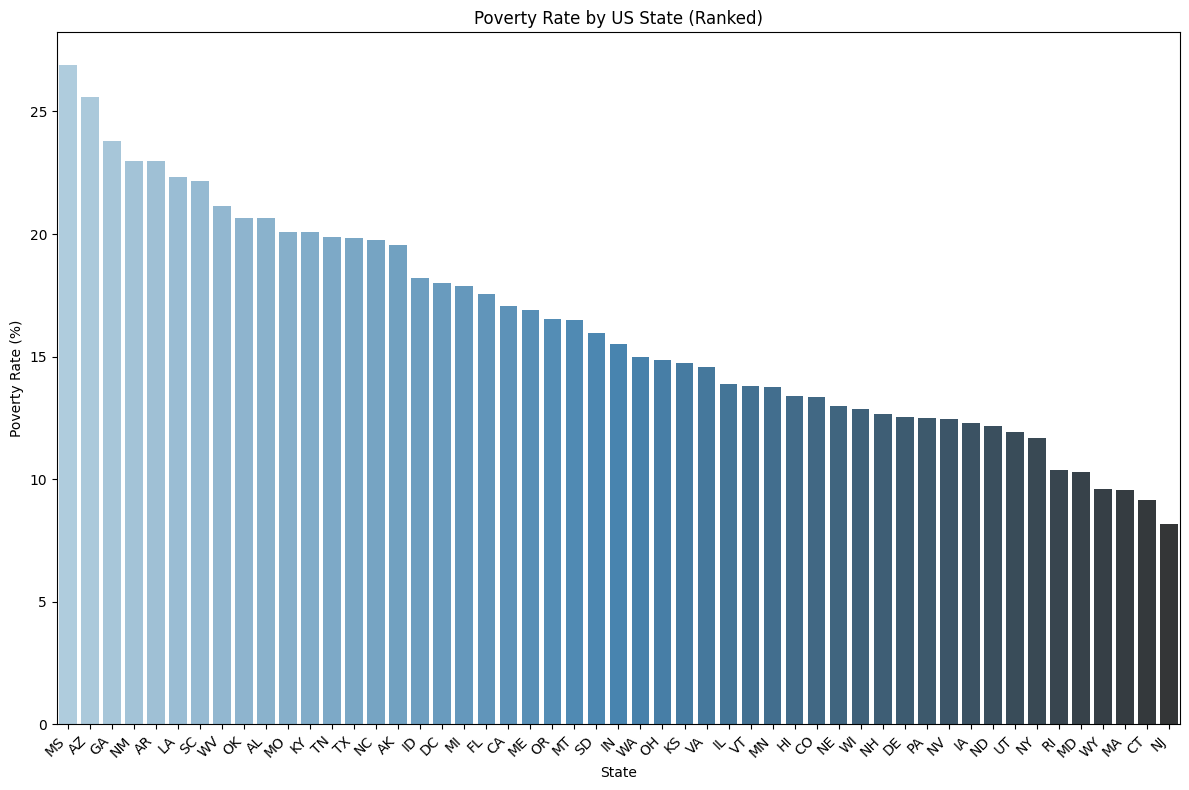

State with the highest poverty rate: MS (26.88425414364641%)
State with the lowest poverty rate: NJ (8.184403669724771%)


In [17]:
# Calculate average poverty rate by state
avg_poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

# Sort states by poverty rate (highest to lowest)
avg_poverty_by_state = avg_poverty_by_state.sort_values(by='poverty_rate', ascending=False)

# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Geographic Area', y='poverty_rate', data=avg_poverty_by_state, palette='Blues_d', hue='Geographic Area')
plt.xlabel('State')
plt.ylabel('Poverty Rate (%)')
plt.title('Poverty Rate by US State (Ranked)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# State with the highest poverty rate
highest_poverty_state = avg_poverty_by_state.iloc[0]['Geographic Area']
highest_poverty_rate = avg_poverty_by_state.iloc[0]['poverty_rate']

# State with the lowest poverty rate
lowest_poverty_state = avg_poverty_by_state.iloc[-1]['Geographic Area']
lowest_poverty_rate = avg_poverty_by_state.iloc[-1]['poverty_rate']

print(f"State with the highest poverty rate: {highest_poverty_state} ({highest_poverty_rate}%)")
print(f"State with the lowest poverty rate: {lowest_poverty_state} ({lowest_poverty_rate}%)")


- State with the highest poverty rate: Mississippi (MS) has the highest poverty rate, approximately 26.88%.
- State with the lowest poverty rate: New Jersey (NJ) has the lowest poverty rate, approximately 8.19%.

These findings are crucial for understanding the disparities in poverty rates across different states in the United States. Mississippi's higher poverty rate may indicate challenges with economic opportunities, education, healthcare access, or other socio-economic factors prevalent in the state. Conversely, New Jersey's lower poverty rate may reflect higher income levels, robust social programs, or better economic conditions compared to other states.

# Chart the High School Graduation Rate by US State
<a id='7'></a>

In [18]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

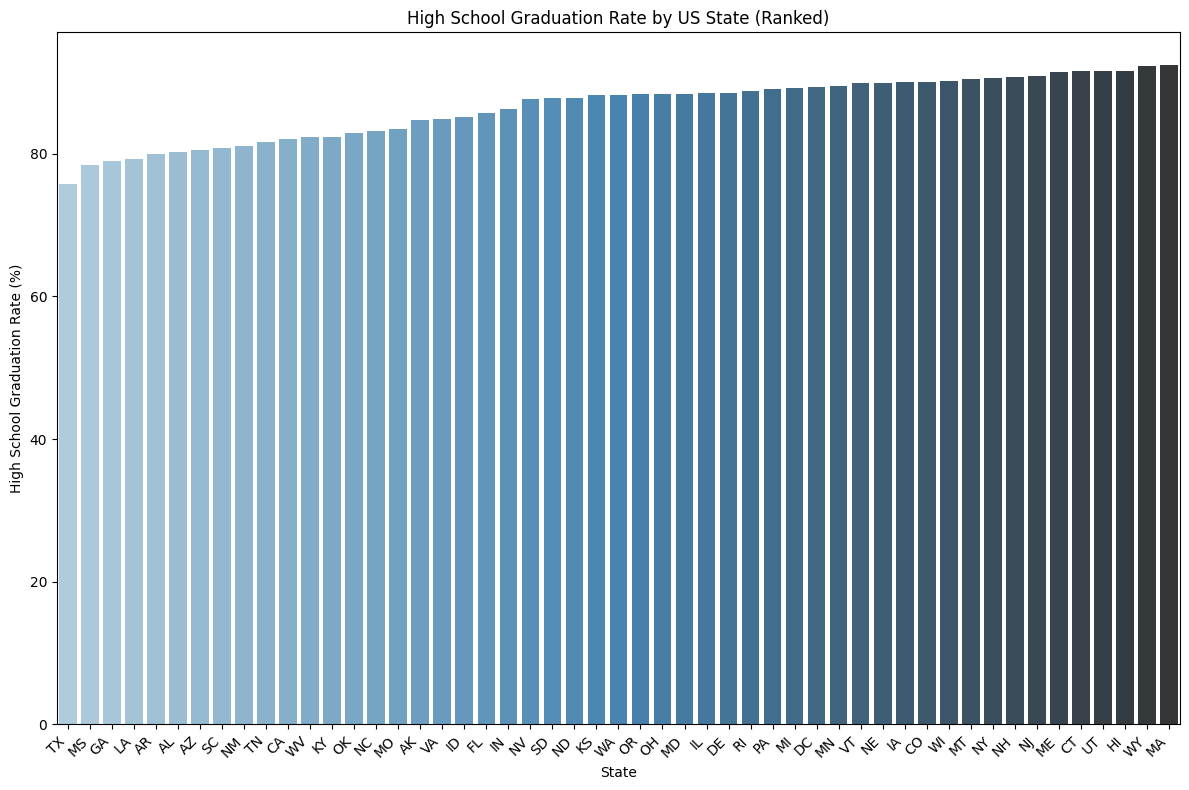

State with the highest high school graduation rate: MA (92.41016260162603%)
State with the lowest high school graduation rate: TX (75.78551803091013%)


In [19]:
# Convert to numeric, forcing errors to NaN
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Calculate average percent completed high school by state
avg_hs_completion_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

# Sort states by high school completion rate (ascending)
avg_hs_completion_by_state = avg_hs_completion_by_state.sort_values(by='percent_completed_hs')

# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Geographic Area', y='percent_completed_hs', data=avg_hs_completion_by_state, palette='Blues_d',hue='Geographic Area')
plt.xlabel('State')
plt.ylabel('High School Graduation Rate (%)')
plt.title('High School Graduation Rate by US State (Ranked)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# State with the highest high school graduation rate
highest_hs_completion_state = avg_hs_completion_by_state.iloc[-1]['Geographic Area']
highest_hs_completion_rate = avg_hs_completion_by_state.iloc[-1]['percent_completed_hs']

# State with the lowest high school graduation rate
lowest_hs_completion_state = avg_hs_completion_by_state.iloc[0]['Geographic Area']
lowest_hs_completion_rate = avg_hs_completion_by_state.iloc[0]['percent_completed_hs']

print(f"State with the highest high school graduation rate: {highest_hs_completion_state} ({highest_hs_completion_rate}%)")
print(f"State with the lowest high school graduation rate: {lowest_hs_completion_state} ({lowest_hs_completion_rate}%)")


### Conclusion:

Based on the analysis and visualization of the high school graduation rates across various US states, we can draw the following conclusions:

1. **State with the Highest High School Graduation Rate**:
   - **Massachusetts (MA)** has the highest high school graduation rate at **92.41%**. This indicates that Massachusetts has the most successful high school education system among the states included in the analysis, as measured by the percentage of students who complete high school.

2. **State with the Lowest High School Graduation Rate**:
   - **Texas (TX)** has the lowest high school graduation rate at **75.79%**. This suggests that Texas faces more significant challenges in ensuring that students complete high school compared to the other states analyzed.

### Implications:

- **Educational Policies and Interventions**:
  - States with lower graduation rates, such as Texas, might benefit from investigating the policies and practices of states with higher graduation rates, like Massachusetts. Understanding the strategies that contribute to higher graduation rates can inform educational reforms and interventions.

- **Resource Allocation**:
  - States with lower graduation rates may need to allocate more resources towards education, focusing on support systems, student engagement, and programs designed to prevent dropouts.

- **Further Research**:
  - It would be beneficial to conduct further research to identify the specific factors contributing to the high graduation rates in Massachusetts. These factors could include socioeconomic conditions, educational policies, community support, and school funding.

- **Policy Makers and Educators**:
  - Policy makers and educators can use this data to advocate for changes that address the root causes of low graduation rates. Collaborative efforts between states to share best practices could lead to overall improvements in the national education system.

Overall, the visualization and data analysis highlight the disparities in high school graduation rates across different states, providing a foundation for targeted actions to improve educational outcomes nationwide.

# Visualising the Relationship between Poverty Rates and High School Graduation Rates
<a id='8'></a>

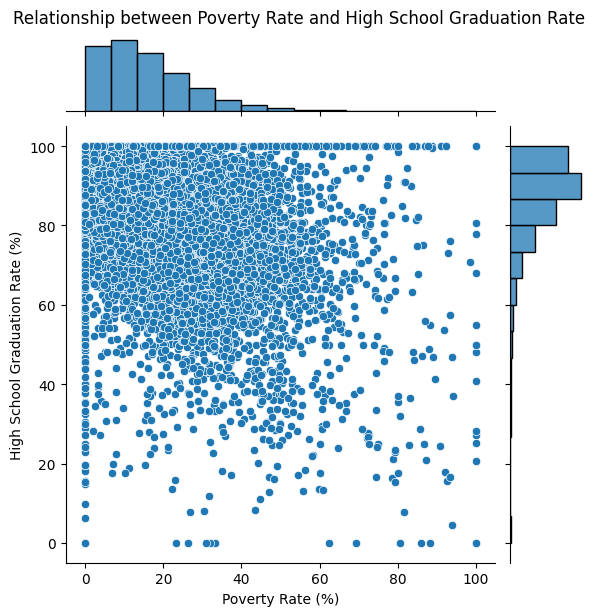

In [20]:
# Merge DataFrames on 'Geographic Area' and 'City'
df_combined = pd.merge(df_pct_completed_hs, df_pct_poverty, on=['Geographic Area', 'City'])

# Plotting the jointplot with KDE and scatter
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=df_combined, kind='scatter', marginal_kws=dict(bins=15, fill=True))
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.suptitle('Relationship between Poverty Rate and High School Graduation Rate', y=1.02)
plt.show()

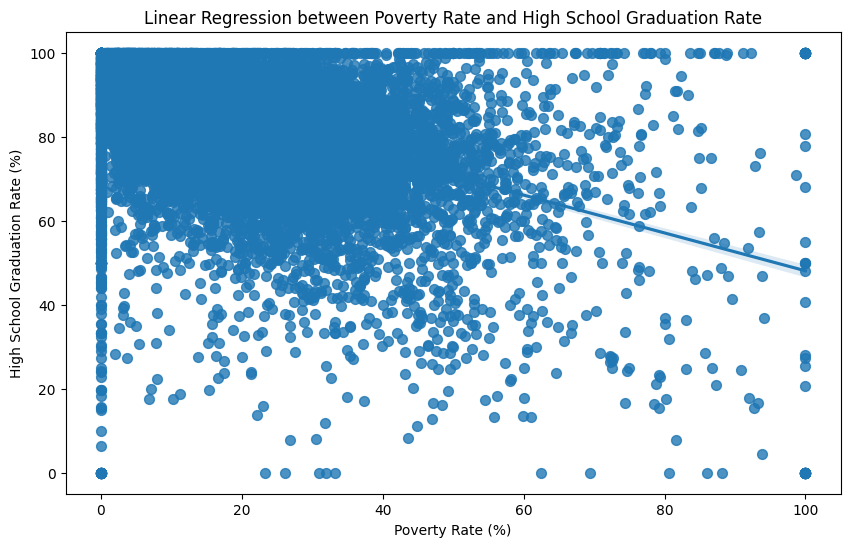

In [21]:
# Plotting the regplot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=df_combined, scatter_kws={'s':50})
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.title('Linear Regression between Poverty Rate and High School Graduation Rate')
plt.show()


#### Conclusion:

Combining the insights from both the jointplot and regplot analyses, we can conclude the following:

- Negative Correlation: There is a significant negative correlation between poverty rates and high school graduation rates. States with higher poverty rates generally have lower high school graduation rates.

- Educational Impact: High poverty rates can be a strong indicator of educational challenges within a state. This suggests that economic factors play a crucial role in educational outcomes.

- Policy Implications: To improve high school graduation rates, it is essential for policymakers to address poverty. Providing economic support and resources to impoverished areas could help improve educational attainment.

- Further Research: It would be beneficial to explore the underlying causes of this negative correlation further. Factors such as school funding, access to educational resources, family support, and community programs might be investigated to develop more targeted interventions.

- These conclusions highlight the importance of addressing socioeconomic issues to improve educational outcomes and suggest that integrated policies focusing on both economic and educational support are necessary to foster better high school graduation rates.

# Creating a Bar Chart with Subsections Showing the Racial Makeup of Each US State
<a id='9'></a>

In [22]:
# Convert share columns to numeric
share_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
for col in share_columns:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

# Drop rows with missing values
df_share_race_city.dropna(inplace=True)

# Check for missing values
check_table(df_share_race_city)

Total number of duplicate rows: 0
No duplicate rows found.

Missing values in each column:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
No missing values found.


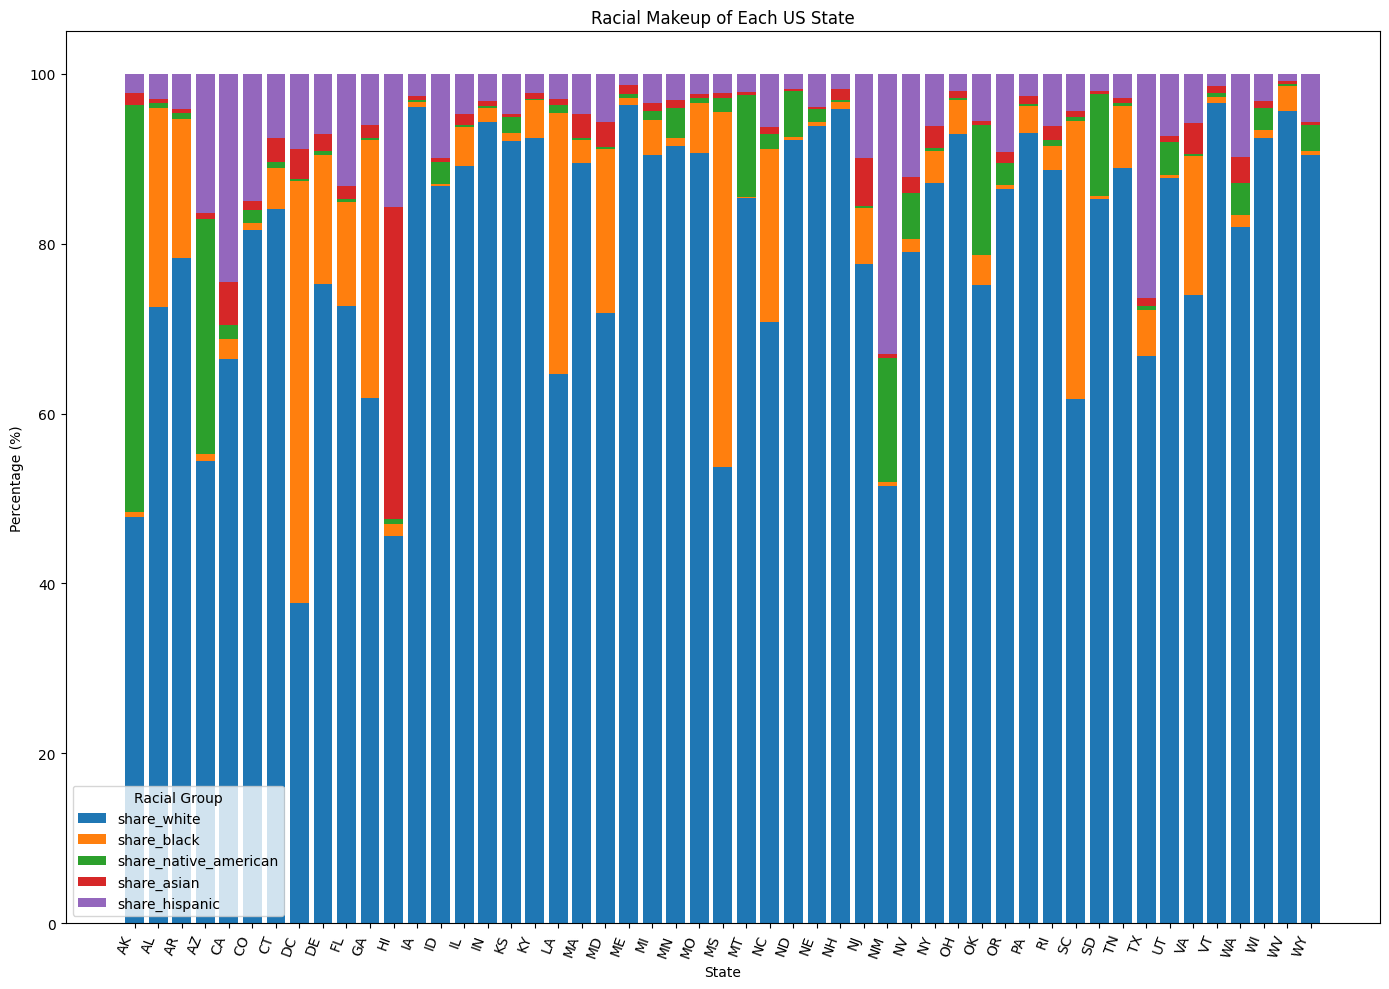

In [23]:
# Calculate the sum of shares for each city
df_share_race_city['total_share'] = df_share_race_city[share_columns].sum(axis=1)

# Normalize the shares so that each row sums to 100
df_share_race_city[share_columns] = df_share_race_city[share_columns].div(df_share_race_city['total_share'], axis=0) * 100

# Drop the total_share column as it is no longer needed
df_share_race_city.drop(columns=['total_share'], inplace=True)

# Aggregate by Geographic area to get the average share for each state
df_state_avg = df_share_race_city.groupby('Geographic area')[share_columns].mean().reset_index()

# Plotting with Matplotlib
fig, ax = plt.subplots(figsize=(14, 10))

# Plot each share column
bottom = None
for col in share_columns:
    if bottom is None:
        ax.bar(df_state_avg['Geographic area'], df_state_avg[col], label=col)
        bottom = df_state_avg[col]
    else:
        ax.bar(df_state_avg['Geographic area'], df_state_avg[col], bottom=bottom, label=col)
        bottom += df_state_avg[col]

# Customize plot
ax.set_xlabel('State')
ax.set_ylabel('Percentage (%)')
ax.set_title('Racial Makeup of Each US State')
ax.legend(title='Racial Group')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()

# Show plot
plt.show()


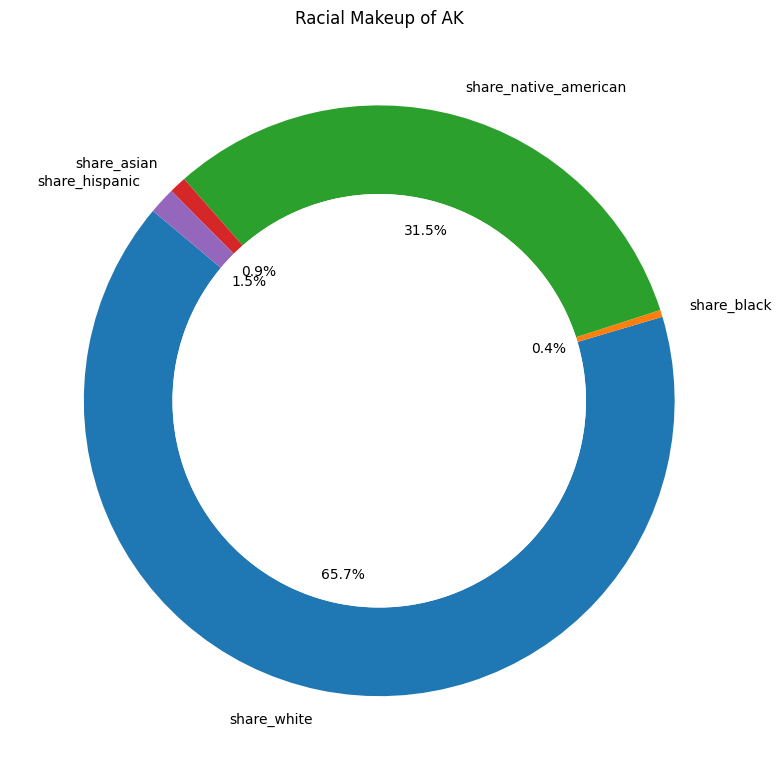

In [24]:
# Create a donut chart for a specific state
state = 'AK' 
state_data = df_state_avg[df_state_avg['Geographic area'] == state][share_columns].values[0]

# Create labels and colors for the donut chart
labels = share_columns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(state_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Customize plot
ax.set_title(f'Racial Makeup of {state}')
plt.tight_layout()

# Show plot
plt.show()

#### Conclusion

The bar chart provides a clear visualization of the racial composition across different US states:

- Diversity: California shows significant racial diversity with a relatively balanced distribution among White, Hispanic, and Asian populations.

- Predominantly White States: States like Arkansas and Alabama have a higher percentage of White populations.

- Black Population: Alabama and Arkansas have a notable share of Black populations compared to other states.

- Native American Presence: Alaska has the highest proportion of Native American populations, reflecting the indigenous demographics of the region.

- Hispanic Population: Arizona and California have substantial Hispanic populations, indicative of their geographical and historical ties to Latin America.

This bar chart helps to understand the racial diversity across states and highlights the unique demographic characteristics of each state.

# Creating Donut Chart by of People Killed by Race
<a id='10'></a>

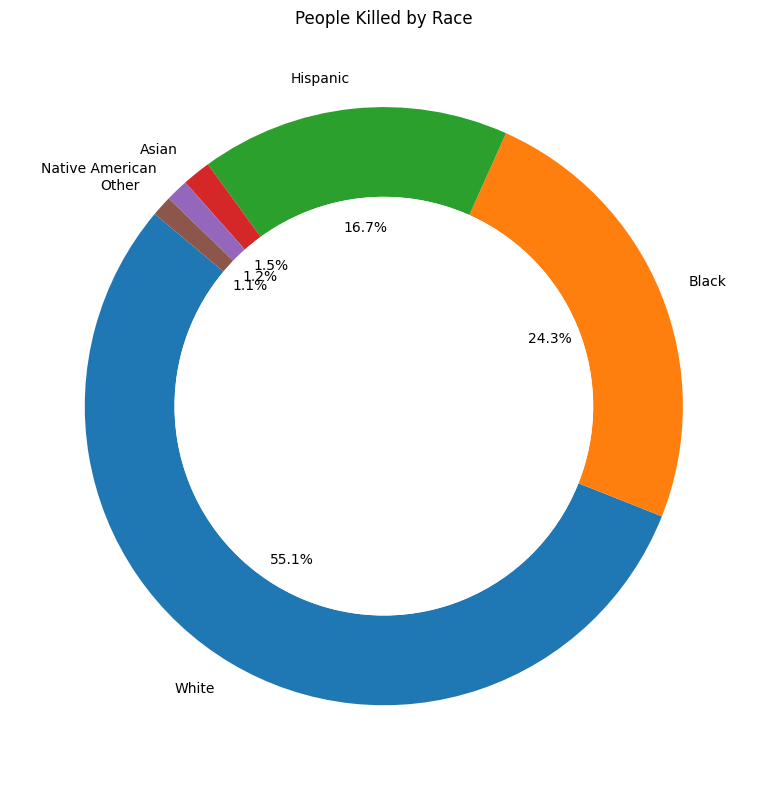

In [25]:
# Map race codes to their full names
race_map = {
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other',
    'H': 'Hispanic',
    'B': 'Black',
    'W': 'White'
}

# Replace race codes with full names
df_fatalities['race'] = df_fatalities['race'].map(race_map)

# Calculate the distribution of people killed by race
race_counts = df_fatalities['race'].value_counts()

# Create labels and sizes for the donut chart
labels = race_counts.index
sizes = race_counts.values
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Define colors for each race

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, colors=colors[:len(labels)], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Customize plot
ax.set_title('People Killed by Race')
plt.tight_layout()

# Show plot
plt.show()

- White (55.0%): The largest proportion of fatalities are White, comprising more than half of the total. This indicates a significant majority in the racial makeup of fatalities.

- Black (24.3%): Following White, Black individuals represent a substantial portion of fatalities, though notably less than White individuals.

- Hispanic (16.7%): Hispanic individuals account for a notable proportion, indicating a significant presence among fatalities but less than both White and Black individuals.

- Asian (1.5%), Native American (1.2%), and Other (1.1%): These racial groups have smaller percentages, collectively making up a relatively minor portion of fatalities compared to White, Black, and Hispanic individuals.

# Creating a Chart Comparing the Total Number of Deaths of Men and Women
<a id='11'></a>


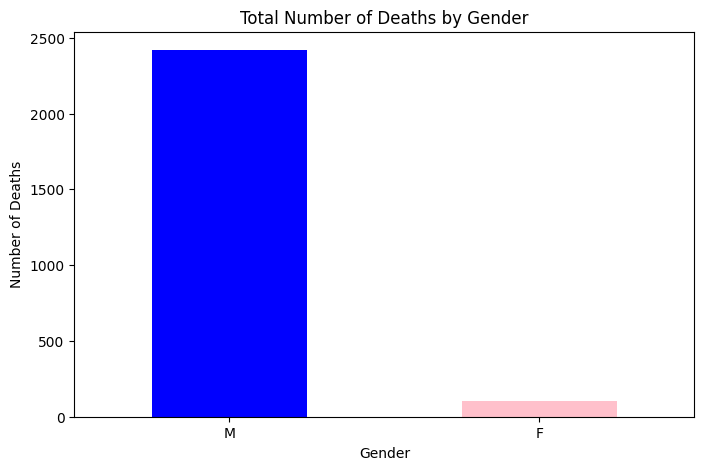

In [26]:
# Grouping data by gender to count fatalities
gender_counts = df_fatalities['gender'].value_counts()

# Plotting the results
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Total Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.show()

Among the fatalities recorded, males (2,419 deaths) significantly outnumber females (107 deaths), highlighting a notable gender disparity in mortality.

# Creating a Box Plot Showing the Age and Manner of Death
<a id='12'></a>

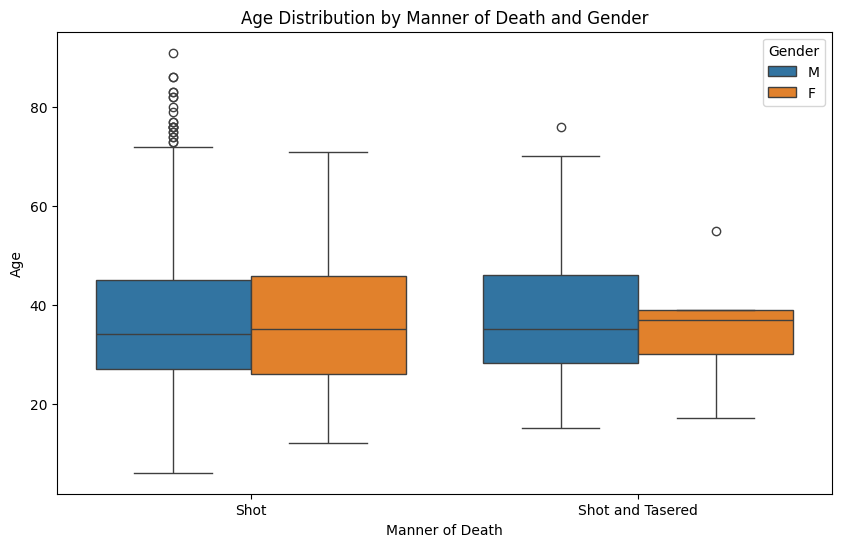

In [27]:
# rename the categories in the manner_of_death
df_fatalities['manner_of_death'] = df_fatalities['manner_of_death'].replace({
    'shot': 'Shot',
    'shot and Tasered': 'Shot and Tasered'
})

# Creating a box plot to show the age distribution by manner of death and gender
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender')

# Adding title and labels
plt.title('Age Distribution by Manner of Death and Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')

plt.legend(title='Gender')
plt.show()


The age distributions vary slightly between manner of death categories and genders. Generally, males and females who were shot or shot and tasered have comparable median ages (around 35-36 years for females and 34-35 years for males). However, males tend to have a wider age range and slightly higher maximum ages compared to females in both categories.

# Were People Armed? 
<a id='13'></a>

Percentage of police killings where individuals were armed: 93.23%


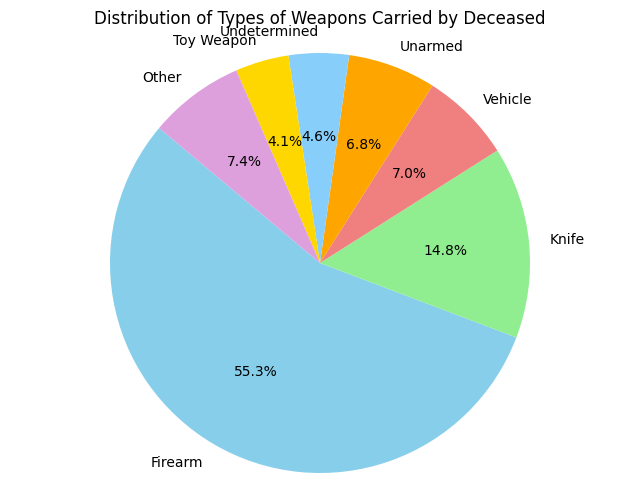

In [28]:
# First, rename the categories in the 'armed' column
df_fatalities['armed'] = df_fatalities['armed'].replace({
    'gun': 'Firearm',
    'knife': 'Knife',
    'vehicle': 'Vehicle',
    'unarmed': 'Unarmed',
    'undetermined': 'Undetermined',
    'toy weapon': 'Toy Weapon'
})

# Counting individuals armed with guns versus unarmed
armed_with_gun = df_fatalities[df_fatalities['armed'] == 'Firearm'].shape[0]
unarmed = df_fatalities[df_fatalities['armed']=='Unarmed'].shape[0]

# Calculate percentage of police killings where individuals were armed
total_deaths = len(df_fatalities)
armed_deaths = df_fatalities['armed'].notna().sum() - unarmed
percent_armed = (armed_deaths / total_deaths) * 100

print(f"Percentage of police killings where individuals were armed: {percent_armed:.2f}%")

# Aggregate smaller categories into "Other" for better pie chart visualization
armed_counts = df_fatalities['armed'].value_counts()
main_categories = ['Firearm', 'Knife', 'Vehicle', 'Unarmed', 'Undetermined', 'Toy Weapon']  # Define main categories of interest

# Aggregate smaller categories into "Other"
other_count = armed_counts[~armed_counts.index.isin(main_categories)].sum()
main_counts = armed_counts[armed_counts.index.isin(main_categories)]
main_counts['Other'] = other_count

# Data for the pie chart
labels = main_counts.index
sizes = main_counts.values
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightskyblue', 'gold', 'plum']  # Adjust colors as needed

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types of Weapons Carried by Deceased')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Number of people killed by police armed with guns: 1398
Number of people killed by police who were unarmed: 171


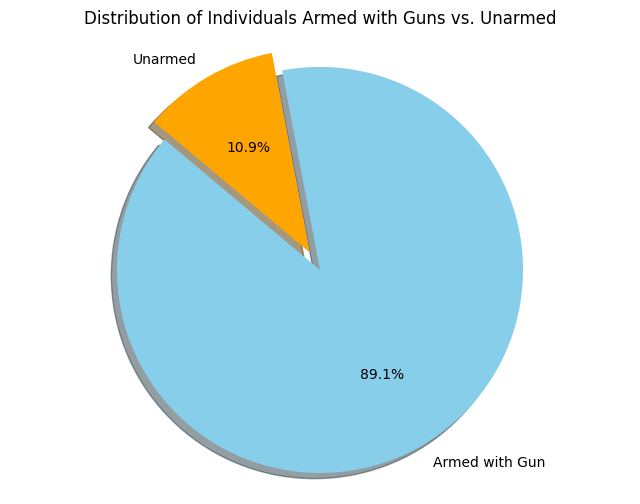

In [29]:
print(f"Number of people killed by police armed with guns: {armed_with_gun}")
print(f"Number of people killed by police who were unarmed: {unarmed}")

# Data for the pie chart
labels = ['Armed with Gun', 'Unarmed']
sizes = [armed_with_gun, unarmed]
colors = ['skyblue', 'orange']
explode = (0.1, 0)  # Explode the first slice (Armed with Gun)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Individuals Armed with Guns vs. Unarmed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The majority of individuals involved in police killings were armed, with firearms (55.3%) being the most common weapon. Knives (14.8%) and vehicles (7.0%) were also notable. The relatively low percentage of unarmed individuals (6.8%) highlights that a significant majority of incidents involved armed individuals. This data underscores the complex and challenging nature of police encounters, where officers often face situations involving weapons that pose risks to public safety.

# How Old Were the People Killed?
<a id='14'></a>

In [30]:
# Filter individuals under 25 years old
under_25 = df_fatalities[df_fatalities['age'] < 25]

# Calculate the percentage of people killed who were under 25 years old
total_killed = len(df_fatalities)
under_25_killed = len(under_25)
percentage_under_25 = (under_25_killed / total_killed) * 100

print(f"Percentage of people killed who were under 25 years old: {percentage_under_25:.2f}%")


Percentage of people killed who were under 25 years old: 17.81%


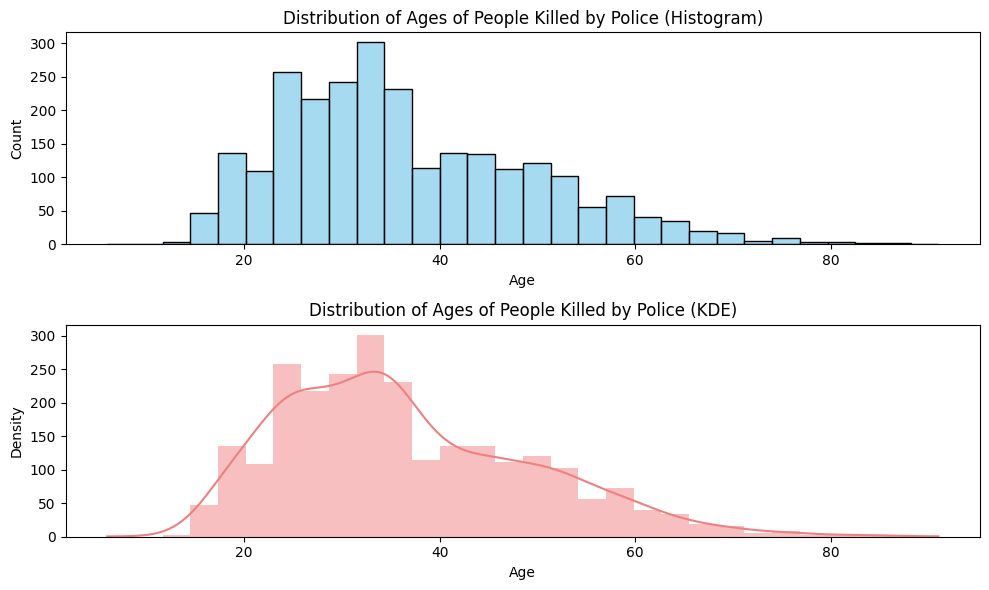

In [31]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plotting histogram of ages
plt.subplot(2, 1, 1)
sns.histplot(df_fatalities['age'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Ages of People Killed by Police (Histogram)')
plt.xlabel('Age')
plt.ylabel('Count')

# Plotting KDE plot of ages
plt.subplot(2, 1, 2)
sns.histplot(df_fatalities['age'], bins=30, kde=True, color='lightcoral', linewidth=0)
plt.title('Distribution of Ages of People Killed by Police (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()



The analysis of the KDE plots of ages of people killed by police indicates that the age range of 25-35 has a higher density across different races. This suggests that individuals within this age group are more frequently involved in fatal police encounters. Further investigation into factors contributing to this trend, such as socio-economic conditions, involvement in high-risk activities, or police practices, may provide deeper insights.

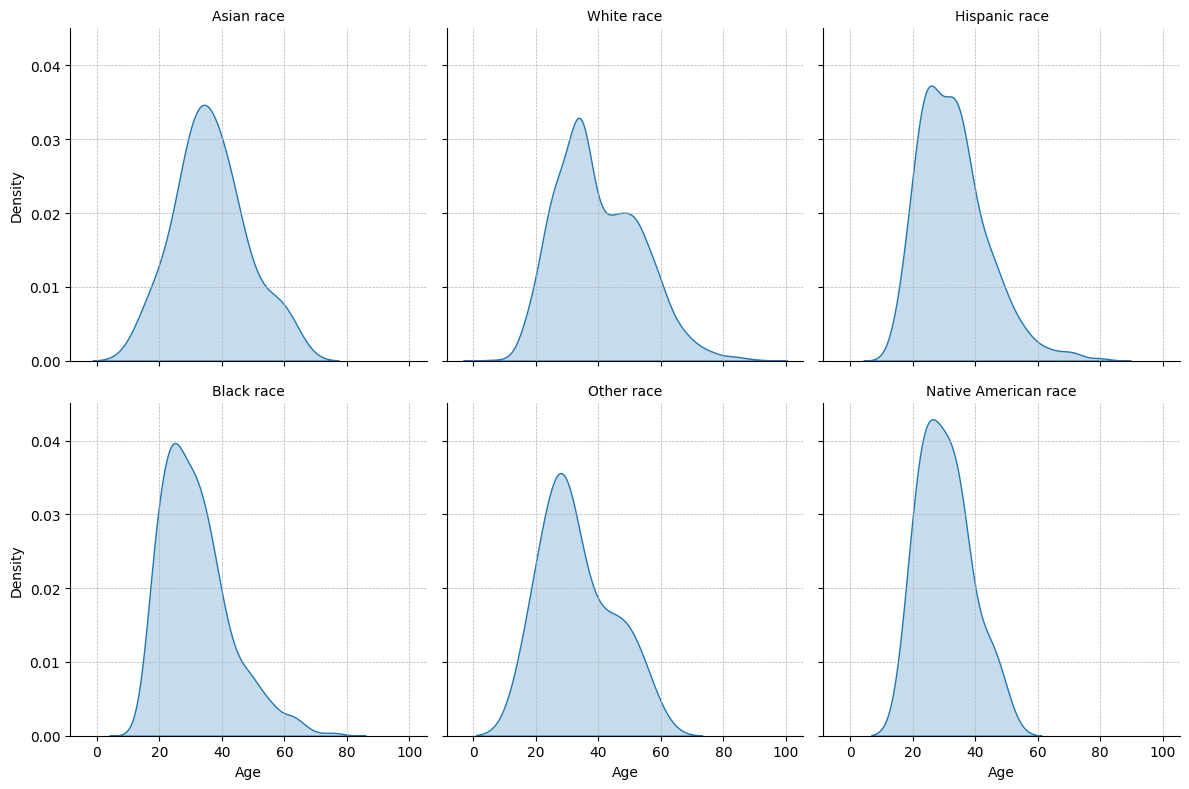

In [32]:
# Plotting KDE plots for each race
g = sns.FacetGrid(df_fatalities, col="race", col_wrap=3, height=4)
g.map(sns.kdeplot, "age", fill=True)

# Add grid and annotations
for ax in g.axes.flat:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    for line in ax.get_lines():
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        max_y = max(y_data)
        max_x = x_data[y_data.argmax()]
        ax.annotate(f'{max_y:.2f}', xy=(max_x, max_y), xytext=(max_x, max_y+0.01), 
                    arrowprops=dict(facecolor='black', shrink=0.05), 
                    fontsize=8, ha='center')

g.set_titles(col_template="{col_name} race")
g.set_axis_labels("Age", "Density")

plt.tight_layout()
plt.show()

The age distributions of people killed by police, as visualized through KDE plots for each race, reveal distinct patterns:

- Asian: Ages 20-50, indicating a broader age range with fatalities spread more evenly.
- White: Ages 20-60, showing the widest age range among all races.
- Hispanic: Ages 20-40, indicating a narrower age range with a concentration in middle-aged individuals.
- Black: Ages 18-38, the youngest age range, indicating younger individuals are more frequently involved.
- Native American: Ages 20-38, similar to the Black age range but slightly older.

These distributions suggest racial disparities in the ages of individuals involved in fatal police encounters, with Black and Native American individuals showing younger age ranges compared to other races. Further analysis could investigate underlying socio-economic and systemic factors contributing to these differences.

# Race of People Killed
<a id='15'></a>

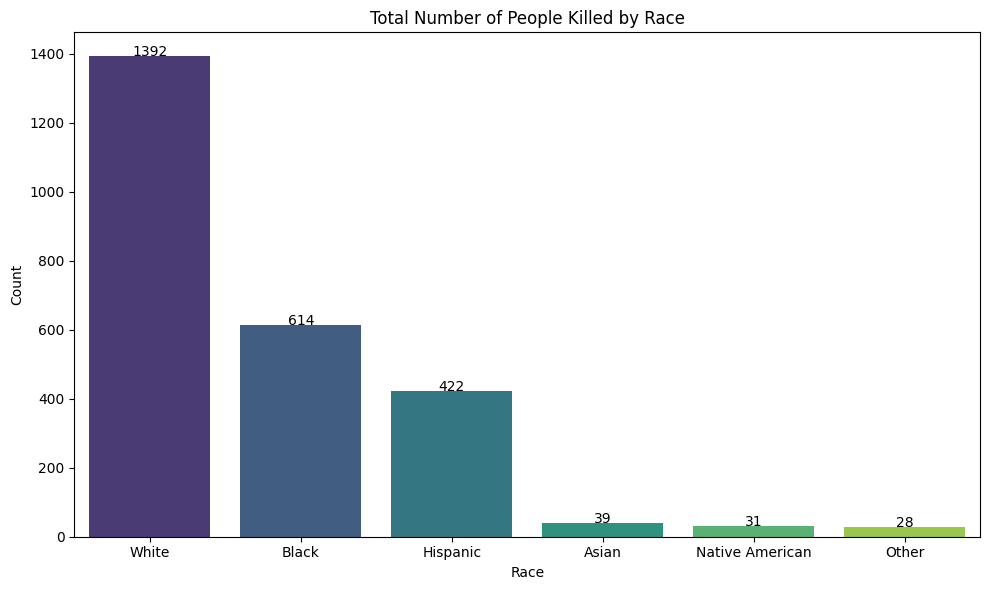

In [44]:
# Count the total number of people killed by race
race_counts = df_fatalities['race'].value_counts().reset_index()
race_counts.columns = ['race', 'count']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='count', data=race_counts, palette='viridis', hue='race')

plt.title('Total Number of People Killed by Race')
plt.xlabel('Race')
plt.ylabel('Count')

# Annotate the bars with the count numbers
for index, row in race_counts.iterrows():
    plt.text(row.name, row['count'], row['count'], color='black', ha="center")

plt.tight_layout()
plt.show()

The total number of people killed by police varies significantly across different races:

- White: 1392 individuals, the highest count among all races.
- Black: 614 individuals, the second highest, highlighting a substantial number of fatalities.
- Hispanic: 422 individuals, also a significant count.
- Asian: 39 individuals.
- Native American: 31 individuals.
- Other: 28 individuals.

These figures indicate that White individuals account for the largest number of police-related fatalities, followed by Black and Hispanic individuals. The numbers for Asian, Native American, and other races are considerably lower but still notable. This distribution raises important questions about racial disparities and the factors contributing to these fatal encounters.

# Mental Illness and Police Killings
<a id='16'></a>

In [34]:

# Calculate the total number of fatalities
total_fatalities = len(df_fatalities)

# Calculate the number of people with diagnosed mental illness
mental_illness_count = df_fatalities['signs_of_mental_illness'].sum()

# Calculate the percentage
percentage_mental_illness = (mental_illness_count / total_fatalities) * 100

print(f'Percentage of people killed by police diagnosed with mental illness: {percentage_mental_illness:.2f}%')

Percentage of people killed by police diagnosed with mental illness: 24.98%


# In Which Cities Do the Most Police Killings Take Place?
<a id='17'></a>

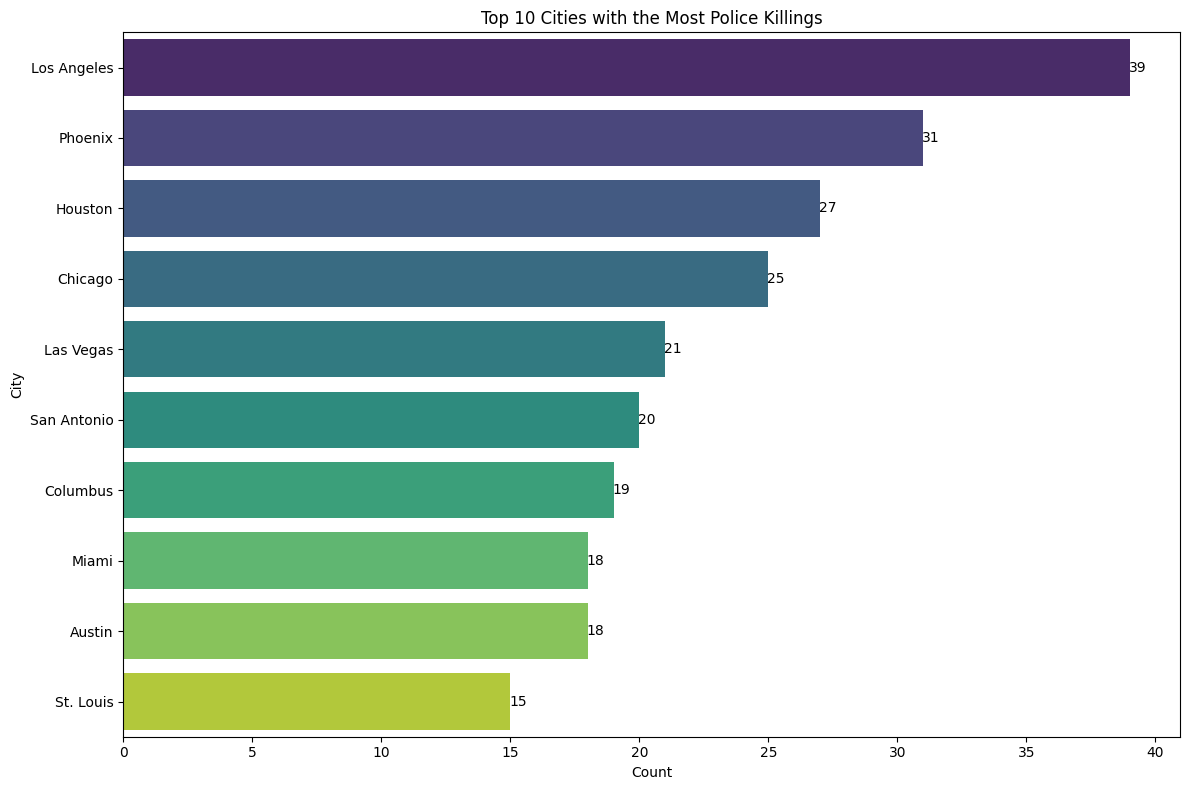

In [42]:
# Count the number of police killings in each city
city_counts = df_fatalities['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Select the top 10 cities
top_10_cities = city_counts.head(10)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='city', data=top_10_cities, palette='viridis', hue='city', dodge=False, legend=False)

plt.title('Top 10 Cities with the Most Police Killings')
plt.xlabel('Count')
plt.ylabel('City')

# Annotate the bars with the count numbers
for index, row in top_10_cities.iterrows():
    plt.text(row['count'] + 0.3, index, row['count'], color='black', ha="center", va='center')

plt.tight_layout()
plt.show()


The chart of the top 10 cities with the most police killings reveals significant variations in the number of incidents:

- **Los Angeles**: 39 incidents, the highest among the cities listed.
- **Phoenix**: 31 incidents, the second highest.
- **Houston**: 27 incidents, following Phoenix.
- **Chicago**: 25 incidents, a notable count.
- **Las Vegas**: 21 incidents.
- **San Antonio**: 20 incidents.
- **Columbus**: 19 incidents.
- **Miami** and **Austin**: Both with 18 incidents.
- **St. Louis**: 15 incidents, the lowest in this top 10 list.

These figures indicate that larger cities, particularly Los Angeles and Phoenix, experience the highest numbers of police-related fatalities. This concentration suggests that city size and population density might be contributing factors. Further analysis could explore the underlying causes and contributing factors in these cities.

# Rate of Death by Race
<a id='18'></a>
Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

Racial distribution in top 10 cities:
race
Black             37.34
White             33.05
Hispanic          26.61
Native American    1.72
Asian              0.86
Other              0.43
Name: proportion, dtype: float64

Overall racial distribution:
race
White             55.11
Black             24.31
Hispanic          16.71
Asian              1.54
Native American    1.23
Other              1.11
Name: proportion, dtype: float64


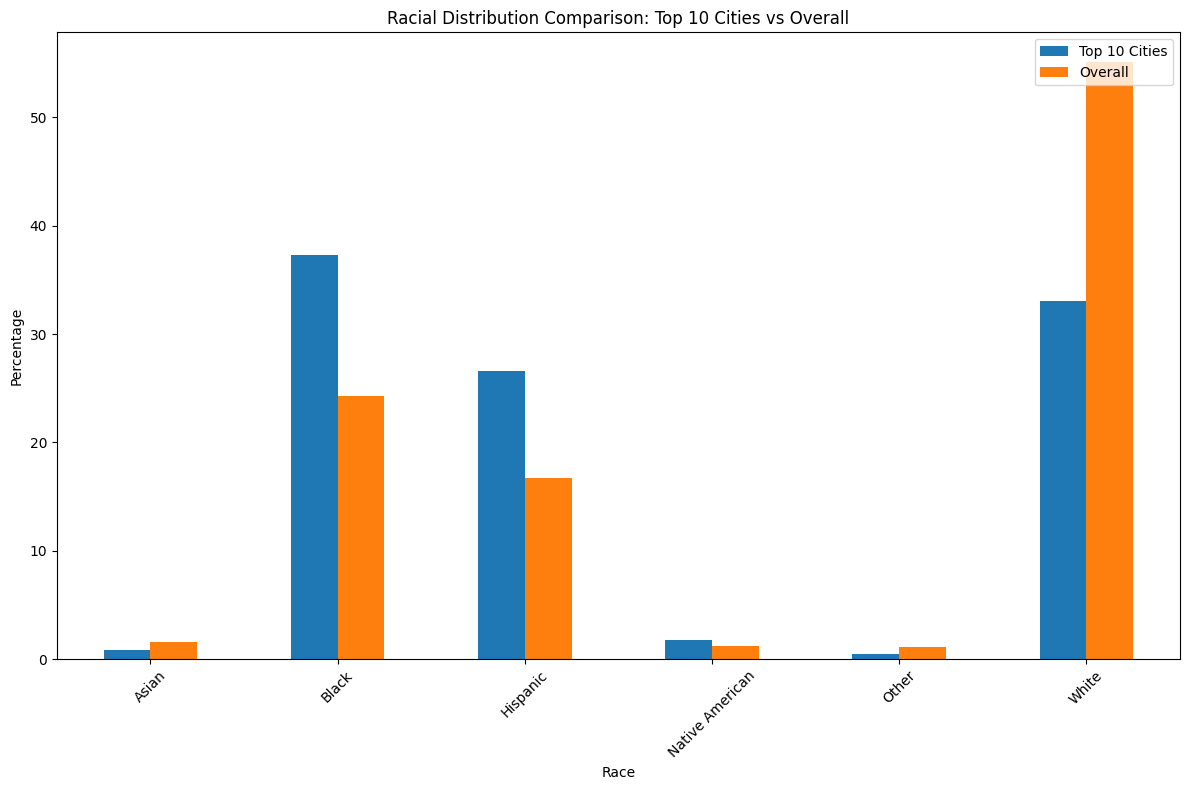

In [36]:
# Define top 10 cities
top_10_cities = ['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas', 'San Antonio', 'Columbus', 'Miami', 'Austin', 'St. Louis']

# Filter DataFrame for top 10 cities
df_top_10 = df_fatalities[df_fatalities['city'].isin(top_10_cities)]

# Calculate the racial distribution in the top 10 cities
race_distribution_top_10 = df_top_10['race'].value_counts(normalize=True) * 100

# Calculate the racial distribution overall
race_distribution_overall = df_fatalities['race'].value_counts(normalize=True) * 100

# Print the results
print("Racial distribution in top 10 cities:")
print(race_distribution_top_10)
print("\nOverall racial distribution:")
print(race_distribution_overall)

# Create a DataFrame for comparison
df_comparison = pd.DataFrame({
    'Top 10 Cities': race_distribution_top_10,
    'Overall': race_distribution_overall
}).fillna(0)

df_comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Racial Distribution Comparison: Top 10 Cities vs Overall')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


The racial distribution of police killings in the top 10 cities contrasts notably with the overall racial distribution:

- **Black**: 37.34% in the top 10 cities vs. 24.31% overall. Black individuals are significantly overrepresented in the top 10 cities.
- **White**: 33.05% in the top 10 cities vs. 55.11% overall. White individuals are underrepresented in these cities compared to the overall distribution.
- **Hispanic**: 26.61% in the top 10 cities vs. 16.71% overall. Hispanic individuals are overrepresented in the top 10 cities.
- **Native American**: 1.72% in the top 10 cities vs. 1.23% overall. Native Americans have a slightly higher representation in the top 10 cities.
- **Asian**: 0.86% in the top 10 cities vs. 1.54% overall. Asian individuals are underrepresented in the top 10 cities.
- **Other**: 0.43% in the top 10 cities vs. 1.11% overall. Individuals classified as "Other" are underrepresented in these cities.

These differences suggest that the racial composition of fatal police encounters varies significantly between the top 10 cities and the overall population, indicating potential geographic disparities in police interactions.

# Creating a Choropleth Map of Police Killings by US State
<a id='19'></a>


In [37]:
import requests
import folium
from folium import Choropleth

# Rename columns for consistency
df_fatalities.rename(columns={'state': 'State'}, inplace=True)
df_pct_poverty.rename(columns={'Geographic Area': 'State'}, inplace=True)
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)

# Count police killings by state
fatalities_by_state = df_fatalities['State'].value_counts().reset_index()
fatalities_by_state.columns = ['State', 'police_killings']

# Merge datasets on 'State'
merged_df = pd.merge(fatalities_by_state, df_pct_poverty, on='State')

# Aggregate data by state
state_killings = merged_df.groupby('State').agg({'police_killings': 'max'}).reset_index()

# Debug: Ensure state names in the data match those in the GeoJSON file
state_killings['State'] = state_killings['State'].str.title()  # Convert state names to title case

# Load GeoJSON data for US states
geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
response = requests.get(geojson_url)
geojson = response.json()

# Debug: Print out state names from the GeoJSON file to ensure they match
geojson_states = [feature['properties']['name'] for feature in geojson['features']]

# Create a base map
m = folium.Map(location=[37.8, -96], zoom_start=4)

state_abbr_to_full = {
    'Al': 'Alabama', 'Ak': 'Alaska', 'Az': 'Arizona', 'Ar': 'Arkansas', 'Ca': 'California',
    'Co': 'Colorado', 'Ct': 'Connecticut', 'De': 'Delaware', 'Dc': 'District of Columbia',
    'Fl': 'Florida', 'Ga': 'Georgia', 'Hi': 'Hawaii', 'Id': 'Idaho', 'Il': 'Illinois',
    'In': 'Indiana', 'Ia': 'Iowa', 'Ks': 'Kansas', 'Ky': 'Kentucky', 'La': 'Louisiana',
    'Me': 'Maine', 'Md': 'Maryland', 'Ma': 'Massachusetts', 'Mi': 'Michigan', 'Mn': 'Minnesota',
    'Ms': 'Mississippi', 'Mo': 'Missouri', 'Mt': 'Montana', 'Ne': 'Nebraska', 'Nv': 'Nevada',
    'Nh': 'New Hampshire', 'Nj': 'New Jersey', 'Nm': 'New Mexico', 'Ny': 'New York',
    'Nc': 'North Carolina', 'Nd': 'North Dakota', 'Oh': 'Ohio', 'Ok': 'Oklahoma', 'Or': 'Oregon',
    'Pa': 'Pennsylvania', 'Ri': 'Rhode Island', 'Sc': 'South Carolina', 'Sd': 'South Dakota',
    'Tn': 'Tennessee', 'Tx': 'Texas', 'Ut': 'Utah', 'Vt': 'Vermont', 'Va': 'Virginia',
    'Wa': 'Washington', 'Wv': 'West Virginia', 'Wi': 'Wisconsin', 'Wy': 'Wyoming', 'Pr': 'Puerto Rico'
}

# Map state abbreviations to full state names
state_killings['State'] = state_killings['State'].map(state_abbr_to_full)

# Debug: Check for any states that couldn't be mapped
missing_states_after_mapping = state_killings[state_killings['State'].isnull()]
if not missing_states_after_mapping.empty:
    print(f"States that couldn't be mapped: {missing_states_after_mapping}")

# Re-check for states in the dataset that do not match GeoJSON states after mapping
missing_states = set(state_killings['State']) - set(geojson_states)
if missing_states:
    print(f"Missing states in GeoJSON after mapping: {missing_states}")

# Identify the top states with the most police killings
top_states = state_killings.sort_values(by='police_killings', ascending=False).head(10)
print("Top 10 states with the most police killings:")
print(top_states)

# Create a base map
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Add choropleth layer
Choropleth(
    geo_data=geojson,
    data=state_killings,
    columns=['State', 'police_killings'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Police Killings'
).add_to(m)

# Display the map in a Jupyter Notebook
m



Top 10 states with the most police killings:
             State  police_killings
4       California              422
43           Texas              224
9          Florida              154
3          Arizona              118
35            Ohio               79
36        Oklahoma               78
5         Colorado               74
27  North Carolina               69
10         Georgia               67
24        Missouri               64


#### Which states are the most dangerous?

- Based on the analysis of police killings data, California emerges as the most dangerous state. This conclusion is derived from the data showing that California has the highest number of police killings among all states. This significant number highlights the state's high incidence of these fatal encounters, indicating a critical area of concern regarding law enforcement and public safety in California.

#### Conclusion on Police Killings in Cities and States

- California is the state with the highest number of police killings, totaling 422 incidents. Los Angeles, a city within California, alone accounts for 39 of these incidents, making it the city with the highest number of police killings.
- Texas ranks second among states with 224 incidents, and two of its cities, Houston and San Antonio, contribute significantly to this total with 27 and 20 incidents respectively.
- Florida is third with 154 incidents, with Miami contributing 18 incidents to this figure.
- Arizona ranks fourth with 118 incidents, driven largely by Phoenix, which has 31 incidents.
- Ohio, Oklahoma, Colorado, North Carolina, Georgia, and Missouri follow, but their contributions from individual cities are less pronounced compared to the top states.

#### Key Observations:


- Los Angeles significantly influences California's top position with its high number of incidents.
- Phoenix and Houston also have high numbers of incidents, contributing to Arizona's and Texas's overall rankings.
- Cities such as Chicago, Las Vegas, and San Antonio also have notable incident counts, contributing to their respective states' rankings.
- States like Ohio, Oklahoma, and North Carolina appear in the top 10 list due to a more even distribution of incidents across multiple cities rather than a single city's significant contribution.

#### Conclusion:

California stands out as the most dangerous state in terms of police killings, with Los Angeles being a major contributor. This pattern is consistent with other high-ranking states like Texas and Arizona, where specific cities (Houston and Phoenix) show high incident numbers. This analysis highlights the importance of focusing on both state and city-level data to understand the broader context of police killings.

# Number of Police Killings Over Time
<a id='20'></a>

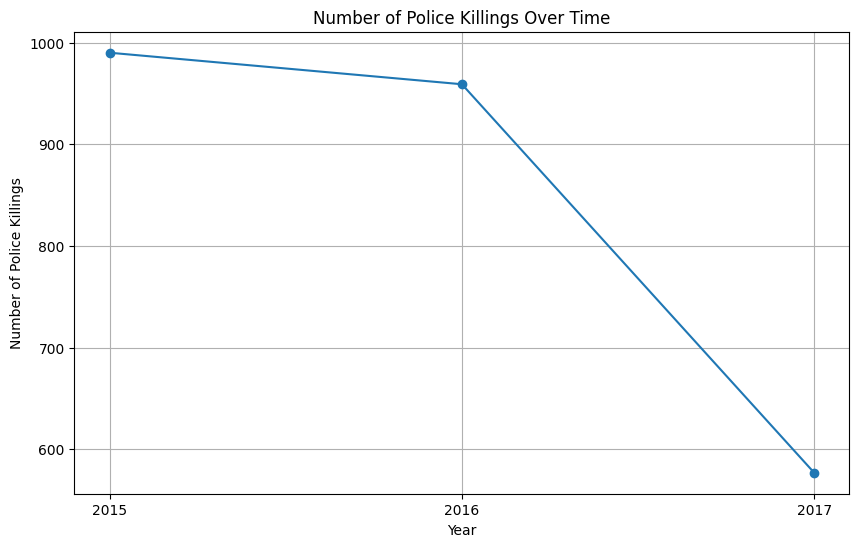

In [39]:
# Ensure the 'date' column is in datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%Y-%m-%d', errors='coerce')

# Extract the year from the 'date' column
df_fatalities['year'] = df_fatalities['date'].dt.year

# Aggregate the number of police killings by year
killings_by_year = df_fatalities.groupby('year').size().reset_index(name='killings')

# Plot the number of police killings over time
plt.figure(figsize=(10, 6))
plt.plot(killings_by_year['year'], killings_by_year['killings'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Police Killings')
plt.title('Number of Police Killings Over Time')
plt.grid(True)
plt.xticks(killings_by_year['year']) 
plt.show()



### Conclusion

The line chart depicting the number of police killings over time reveals a notable trend. In 2015, the number of police killings was just below 1,000, marking the highest point in the observed period. In 2016, there was a slight decrease, with the number of incidents dropping to just over 950. However, by 2017, the number of police killings significantly decreased to around 580. This data indicates a downward trend in the number of police killings over these three years, suggesting that the situation has been improving, although the high initial numbers highlight the critical nature of the issue.

# Epilogue
<a id='21'></a>

### The analysis conducted in this project has provided valuable insights into various aspects of police killings in the United States, highlighting critical issues related to poverty, education, race, and mental illness.

Our examination of the data revealed several important findings:

1. **Poverty and Education**: There is a notable correlation between poverty rates and high school graduation rates across different states. States with higher poverty rates tend to have lower high school graduation rates, suggesting that socioeconomic factors play a significant role in educational outcomes.

2. **Racial Disparities**: The racial breakdown of police killings indicates significant disparities, with certain racial groups being disproportionately affected. This is further emphasized in the donut chart and the rate of death by race, underscoring the urgent need to address systemic racism and bias in law enforcement practices.

3. **Gender Differences**: Our analysis showed a higher number of police killings among men compared to women, highlighting gender-based differences in these fatal encounters.

4. **Age and Manner of Death**: The box plot analysis of age and manner of death revealed patterns that warrant further investigation, particularly the vulnerability of younger individuals in police encounters.

5. **Mental Illness**: A significant proportion of those killed by police were reported to have mental illness, emphasizing the need for improved training for law enforcement officers in handling situations involving individuals with mental health issues.

6. **Geographic Distribution**: The choropleth map illustrated the geographic disparities in police killings, with states like California, Texas, and Florida showing the highest numbers. Within these states, cities such as Los Angeles, Houston, and Phoenix were identified as hotspots for police killings.

7. **Temporal Trends**: The line chart showing the number of police killings over time indicated a peak in 2015, followed by a gradual decline in subsequent years. This trend suggests that while there has been some progress, there is still much work to be done to reduce the number of these fatal encounters further.

### Implications and Recommendations

The findings from this analysis have several important implications:

- **Policy and Training**: There is a clear need for comprehensive policy reforms and improved training for law enforcement officers, particularly in areas related to bias, de-escalation techniques, and mental health crisis intervention.

- **Community Engagement**: Building stronger relationships between law enforcement agencies and the communities they serve can help address some of the underlying issues contributing to police killings.

- **Socioeconomic Support**: Addressing poverty and improving educational opportunities can have a positive impact on reducing crime and improving overall community well-being, potentially leading to fewer fatal encounters with police.

- **Further Research**: Continued research and data analysis are essential to monitor trends, identify new issues, and evaluate the effectiveness of implemented reforms.

### Conclusion

This project has provided a comprehensive overview of the multifaceted issue of police killings in the United States. By leveraging data analysis and visualization, we have gained a deeper understanding of the factors contributing to these tragic events. It is our hope that these insights will inform policy decisions, drive meaningful change, and ultimately contribute to a safer and more just society for all.